## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
                      )

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True
)
    

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# check how many NaN values there are in the dataframe
bitstamp.isnull().sum()

# drop all NaN values and store in a new variable
bitstamp_cleaned = bitstamp.dropna()

# check if dropna worked by recounting NaN values
bitstamp_cleaned.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_cleaned.loc[:,"Close"] = bitstamp_cleaned.loc[:,"Close"].str.replace("$", "")

# display the first five rows to make sure the "Close" column no longer has the $ sign
bitstamp_cleaned.head()

C:\Users\heeje\AppData\Local\Temp/ipykernel_21352/2793872798.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp_cleaned.loc[:,"Close"] = bitstamp_cleaned.loc[:,"Close"].str.replace("$", "")
C:\Users\heeje\.conda\envs\dev\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
bitstamp_cleaned.loc[:,"Close"] = bitstamp_cleaned.loc[:,"Close"].astype("float")

# Check to make sure the "Close" column is now a float datatype
bitstamp_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


C:\Users\heeje\.conda\envs\dev\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_cleaned.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
# check how many NaN values there are in the dataframe
coinbase.isnull().sum()

# drop all NaN values and store in a new variable
coinbase_cleaned = coinbase.dropna()

# check if dropna worked by recounting NaN values
coinbase_cleaned.isnull().sum()

# Use the str.replace function to remove the dollar sign, $
coinbase_cleaned.loc[:,"Close"] = coinbase_cleaned.loc[:,"Close"].str.replace("$", "")

# display the first five rows to make sure the "Close" column no longer has the $ sign
coinbase_cleaned.head()

# Convert the Close data type to a float
coinbase_cleaned.loc[:,"Close"] = coinbase_cleaned.loc[:,"Close"].astype("float")

# Check to make sure the "Close" column is now a float datatype
coinbase_cleaned.info()

# Review the data for duplicate values, and drop them if necessary
coinbase_cleaned.duplicated().sum()

C:\Users\heeje\AppData\Local\Temp/ipykernel_21352/2998916886.py:13: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase_cleaned.loc[:,"Close"] = coinbase_cleaned.loc[:,"Close"].str.replace("$", "")


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_cleaned.loc[:,["Close"]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_cleaned.loc[:,["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [14]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitcoin Closing Prices on Bitstamp - 2018-Q1'}, xlabel='Timestamp'>

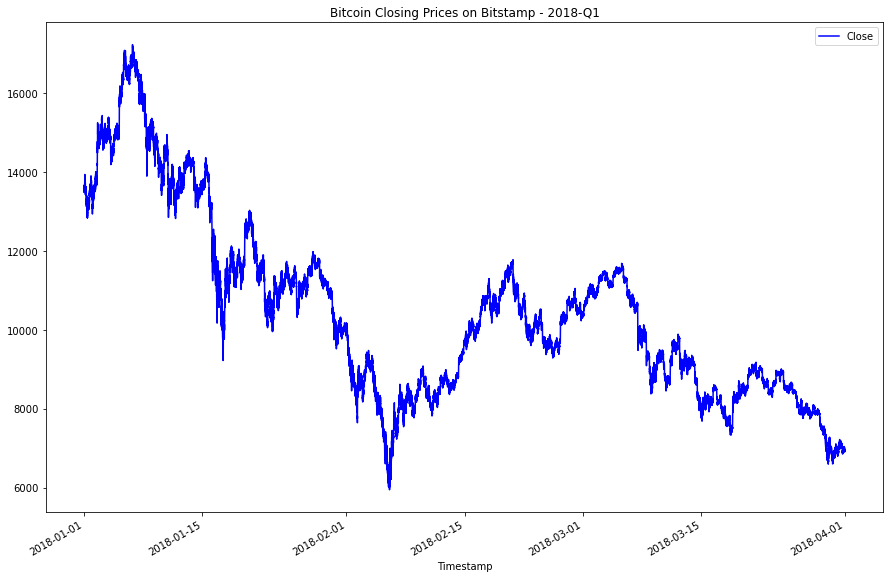

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize=(15,10),title="Bitcoin Closing Prices on Bitstamp - 2018-Q1",color="blue")

<AxesSubplot:title={'center':'Bitcoin Closing Prices on Coinbase - 2018-Q1'}, xlabel='Timestamp'>

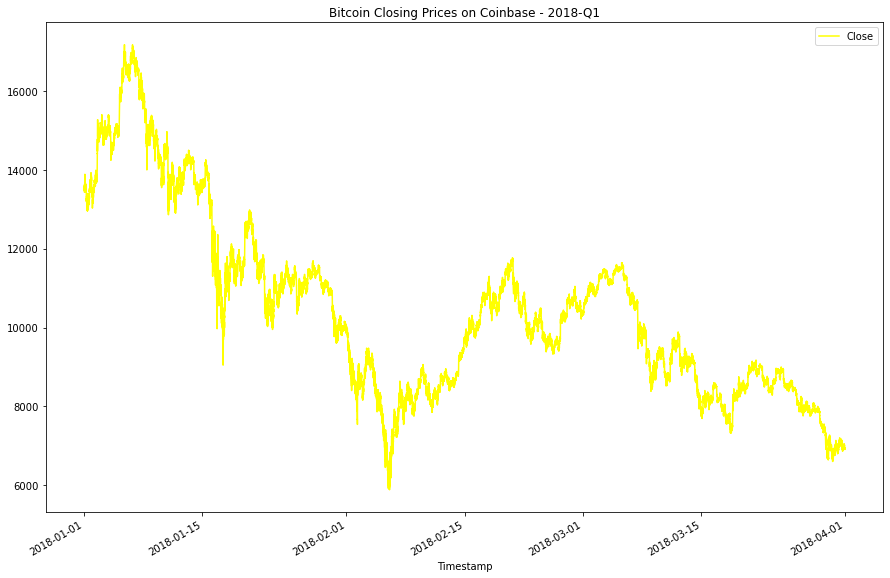

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize=(15,10),title="Bitcoin Closing Prices on Coinbase - 2018-Q1",color="yellow")

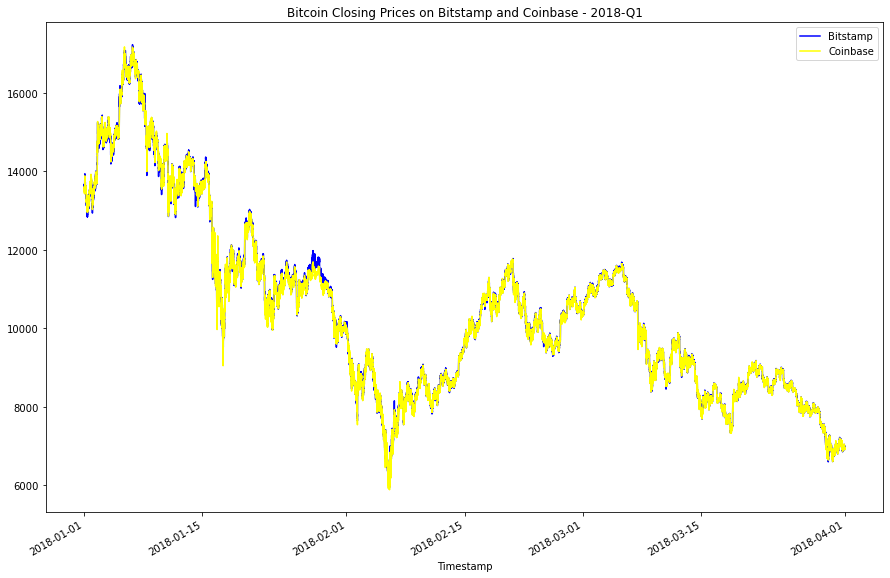

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax=bitstamp_sliced.plot(
    legend=True,
    figsize=(15,10),
    title="Bitcoin Closing Prices on Bitstamp and Coinbase - 2018-Q1",
    color="blue")
coinbase_sliced.plot(ax=ax, color="yellow")

# define plot's legend by setting parameter of the legend function as a list of the plot's names in order, replacing the labels
ax.legend(["Bitstamp","Coinbase"])

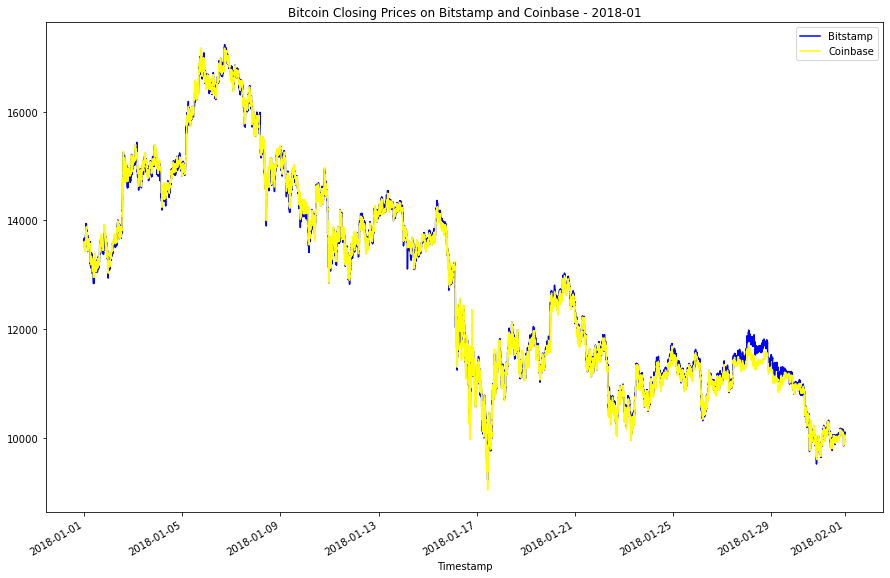

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax=bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(
    legend=True,
    figsize=(15,10),
    title="Bitcoin Closing Prices on Bitstamp and Coinbase - 2018-01",
    color="blue")
coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(ax=ax, color="yellow")
ax.legend(["Bitstamp","Coinbase"])

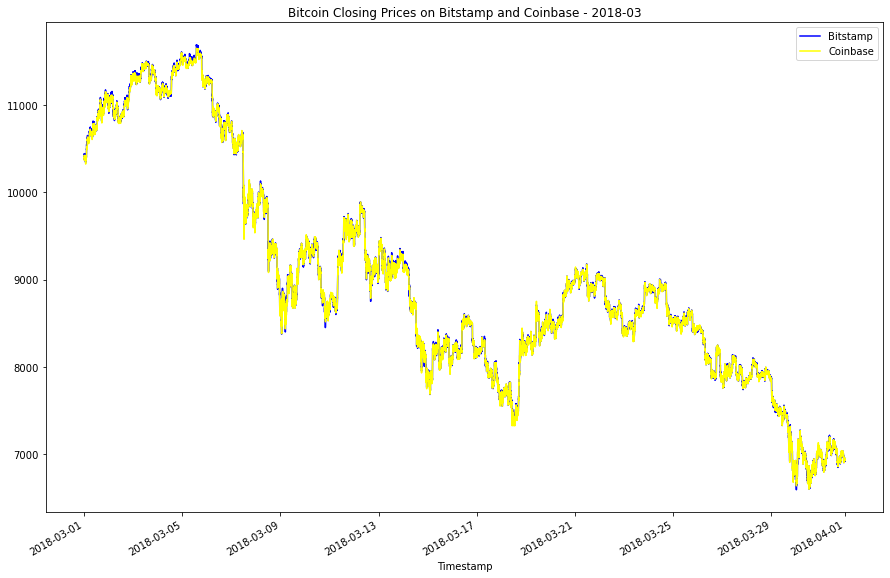

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax=bitstamp_sliced.loc['2018-03-01':'2018-03-31'].plot(
    legend=True,
    figsize=(15,10),
    title="Bitcoin Closing Prices on Bitstamp and Coinbase - 2018-03",
    color="blue")
coinbase_sliced.loc['2018-03-01':'2018-03-31'].plot(ax=ax, color="yellow")
ax.legend(["Bitstamp","Coinbase"])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** There seems to be a greater spread between Bitstamp and Coinbase earlier in the time period than later, as evidenced by the greater visibility of blue in the earlier period when compared with the later period.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

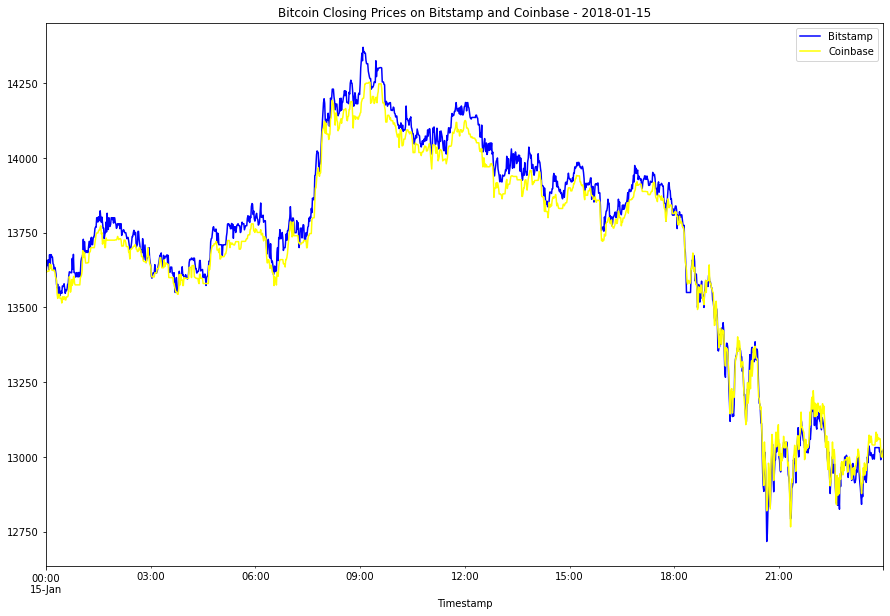

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax=bitstamp_sliced.loc['2018-01-15':'2018-01-15'].plot(
    legend=True,
    figsize=(15,10),
    title="Bitcoin Closing Prices on Bitstamp and Coinbase - 2018-01-15",
    color="blue")
coinbase_sliced.loc['2018-01-15':'2018-01-15'].plot(ax=ax, color="yellow")
ax.legend(["Bitstamp","Coinbase"])

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-15':'2018-01-15'] - bitstamp_sliced.loc['2018-01-15':'2018-01-15']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1440.000000
mean,-28.953458
std,35.145705
min,-170.980000
25%,-52.217500
50%,-34.035000
75%,-10.000000
max,106.080000


<AxesSubplot:>

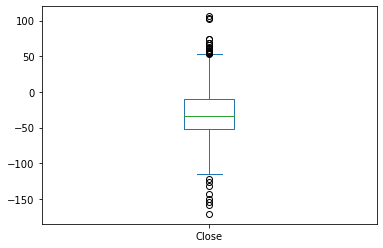

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

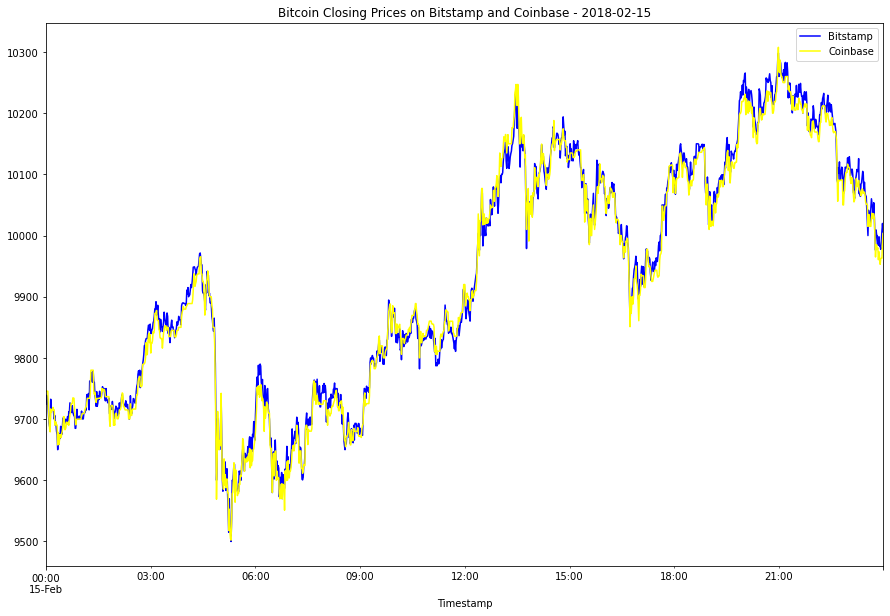

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax=bitstamp_sliced.loc['2018-02-15':'2018-02-15'].plot(
    legend=True,
    figsize=(15,10),
    title="Bitcoin Closing Prices on Bitstamp and Coinbase - 2018-02-15",
    color="blue")
coinbase_sliced.loc['2018-02-15':'2018-02-15'].plot(ax=ax, color="yellow")
ax.legend(["Bitstamp","Coinbase"])

In [24]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-15':'2018-02-15'] - bitstamp_sliced.loc['2018-02-15':'2018-02-15']

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1440.000000
mean,-5.760007
std,14.908671
min,-55.470000
25%,-16.217500
50%,-6.960000
75%,3.995000
max,48.800000


<AxesSubplot:>

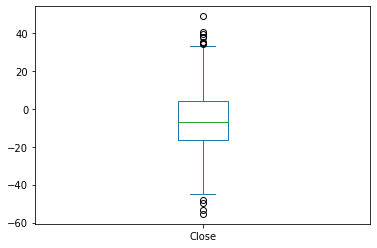

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

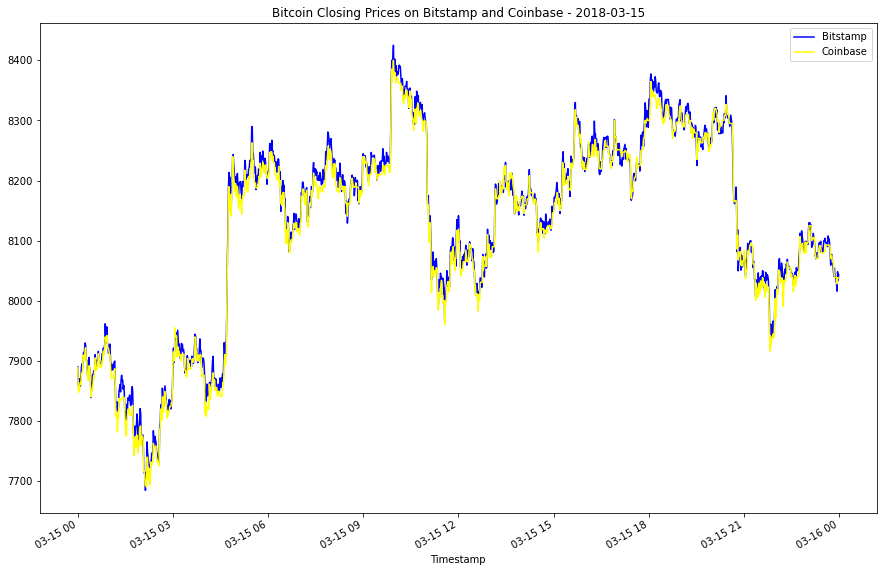

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax=bitstamp_sliced.loc['2018-03-15':'2018-03-15'].plot(
    legend=True,
    figsize=(15,10),
    title="Bitcoin Closing Prices on Bitstamp and Coinbase - 2018-03-15",
    color="blue")
coinbase_sliced.loc['2018-03-15':'2018-03-15'].plot(ax=ax, color="yellow")
ax.legend(["Bitstamp","Coinbase"])

In [27]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-03-15':'2018-03-15'] - bitstamp_sliced.loc['2018-03-15':'2018-03-15']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1437.00000
mean,-8.76572
std,10.74975
min,-48.98000
25%,-15.74000
50%,-8.74000
75%,-1.74000
max,24.71000


<AxesSubplot:>

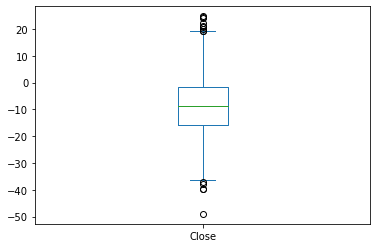

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-15':'2018-01-15'] - coinbase_sliced.loc['2018-01-15':'2018-01-15']
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-15':'2018-02-15'] - coinbase_sliced.loc['2018-02-15':'2018-02-15']
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-15':'2018-03-15'] - coinbase_sliced.loc['2018-03-15':'2018-03-15']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# encapsulating in display function to display all three at once in Jupyter notebook
display(arbitrage_spread_early[arbitrage_spread_early > 0].describe())
display(arbitrage_spread_middle[arbitrage_spread_middle > 0].describe())
display(arbitrage_spread_late[arbitrage_spread_late > 0].describe())


,Close
count,1166.000000
mean,42.124322
std,22.912901
min,0.010000
25%,26.315000
50%,40.290000
75%,56.150000
max,170.980000


,Close
count,970.000000
mean,13.963979
std,9.337793
min,0.010000
25%,6.715000
50%,12.735000
75%,19.667500
max,55.470000


,Close
count,1148.000000
mean,12.506490
std,8.254083
min,0.010000
25%,5.937500
50%,11.180000
75%,18.002500
max,48.980000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [30]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / coinbase_sliced.loc['2018-01-15':'2018-01-15']
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase_sliced.loc['2018-02-15':'2018-02-15']
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / coinbase_sliced.loc['2018-03-15':'2018-03-15']

# Review the spread return DataFrame
# using display function to display all three at once
display(spread_return_early)
display(spread_return_middle)
display(spread_return_late)

,Close
Timestamp,
2018-01-15 00:00:00,NaN
2018-01-15 00:01:00,0.001451
2018-01-15 00:02:00,0.002781
2018-01-15 00:03:00,0.001365
2018-01-15 00:04:00,0.002754
...,...
2018-01-15 23:55:00,NaN
2018-01-15 23:56:00,0.000084
2018-01-15 23:57:00,0.001508


,Close
Timestamp,
2018-02-15 00:00:00,NaN
2018-02-15 00:01:00,NaN
2018-02-15 00:02:00,NaN
2018-02-15 00:03:00,NaN
2018-02-15 00:04:00,NaN
...,...
2018-02-15 23:55:00,0.001554
2018-02-15 23:56:00,0.002714
2018-02-15 23:57:00,0.004448


,Close
Timestamp,
2018-03-15 00:00:00,0.000124
2018-03-15 00:01:00,0.000435
2018-03-15 00:02:00,0.001256
2018-03-15 00:03:00,0.002620
2018-03-15 00:04:00,NaN
...,...
2018-03-15 23:55:00,NaN
2018-03-15 23:56:00,NaN
2018-03-15 23:57:00,0.001275


#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [36]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
display(profitable_trades_early.head())
display(profitable_trades_middle.head())
display(profitable_trades_late.head())

,Close
Timestamp,
2018-01-15 00:00:00,NaN
2018-01-15 00:01:00,NaN
2018-01-15 00:02:00,NaN
2018-01-15 00:03:00,NaN
2018-01-15 00:04:00,NaN


,Close
Timestamp,
2018-02-15 00:00:00,NaN
2018-02-15 00:01:00,NaN
2018-02-15 00:02:00,NaN
2018-02-15 00:03:00,NaN
2018-02-15 00:04:00,NaN


,Close
Timestamp,
2018-03-15 00:00:00,NaN
2018-03-15 00:01:00,NaN
2018-03-15 00:02:00,NaN
2018-03-15 00:03:00,NaN
2018-03-15 00:04:00,NaN


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [34]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
display(profitable_trades_early.describe())
display(profitable_trades_middle.describe())
display(profitable_trades_late.describe())

,Close
count,5.000000
mean,0.010942
std,0.000736
min,0.010075
25%,0.010570
50%,0.010843
75%,0.011180
max,0.012042


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [37]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-15':'2018-01-15']
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-15':'2018-02-15']
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-15':'2018-03-15']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
display(profit_per_trade_early)
display(profit_per_trade_middle)
display(profit_per_trade_late)

,Close
Timestamp,
2018-01-15 09:01:00,149.59
2018-01-15 09:02:00,142.92
2018-01-15 09:03:00,158.67
2018-01-15 09:05:00,170.98
2018-01-15 09:06:00,153.97


,Close
Timestamp,


,Close
Timestamp,


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [38]:
# Generate the summary statistics for the early profit per trade DataFrame
display(profit_per_trade_early.describe())
display(profit_per_trade_middle.describe())
display(profit_per_trade_late.describe())

,Close
count,5.000000
mean,155.226000
std,10.545489
min,142.920000
25%,149.590000
50%,153.970000
75%,158.670000
max,170.980000


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


,Close
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


<AxesSubplot:title={'center':'Bitcoin Profits - Early'}, xlabel='Timestamp'>

<AxesSubplot:title={'center':'Bitcoin Profits - Middle'}, xlabel='Timestamp'>

<AxesSubplot:title={'center':'Bitcoin Profits - Late'}, xlabel='Timestamp'>

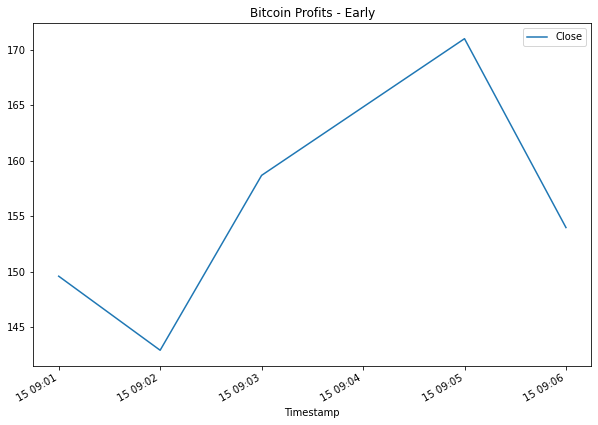

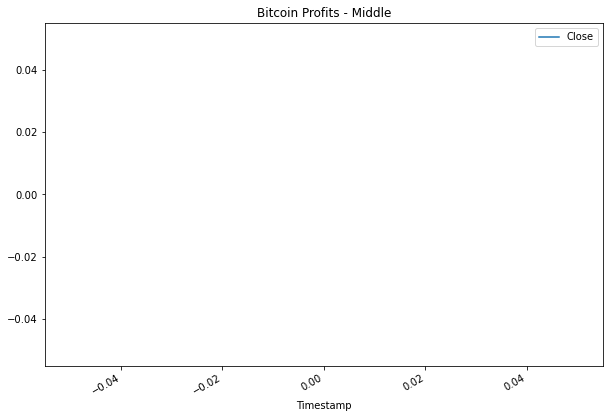

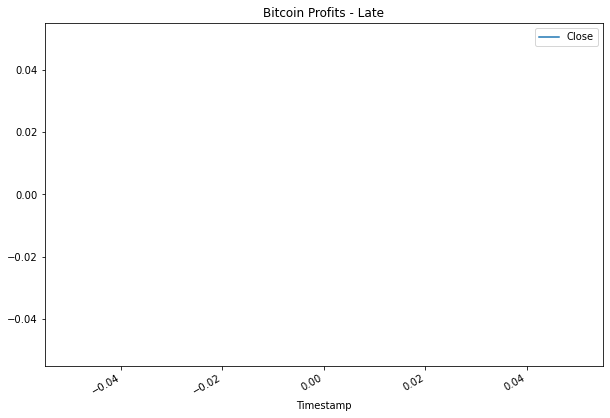

In [40]:
# Plot the results for the early profit per trade DataFrame
display(profit_per_trade_early.plot(figsize=(10,7),title="Bitcoin Profits - Early"))
display(profit_per_trade_middle.plot(figsize=(10,7),title="Bitcoin Profits - Middle"))
display(profit_per_trade_late.plot(figsize=(10,7),title="Bitcoin Profits - Late"))

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [45]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_early_sum = profit_per_trade_early.sum()
display(profit_early_sum)

profit_middle_sum = profit_per_trade_middle.sum()
display(profit_middle_sum)

profit_late_sum = profit_per_trade_late.sum()
display(profit_late_sum)

Close    776.13
dtype: float64

Close    0.0
dtype: float64

Close    0.0
dtype: float64

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [54]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
display(cumulative_profit_early)

cumulative_profit_middle = profit_per_trade_middle.cumsum()
display(cumulative_profit_middle)

cumulative_profit_late = profit_per_trade_late.cumsum()
display(cumulative_profit_late)

,Close
Timestamp,
2018-01-15 09:01:00,149.59
2018-01-15 09:02:00,292.51
2018-01-15 09:03:00,451.18
2018-01-15 09:05:00,622.16
2018-01-15 09:06:00,776.13


,Close
Timestamp,


,Close
Timestamp,


<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Early'}, xlabel='Timestamp'>

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Middle'}, xlabel='Timestamp'>

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits - Late'}, xlabel='Timestamp'>

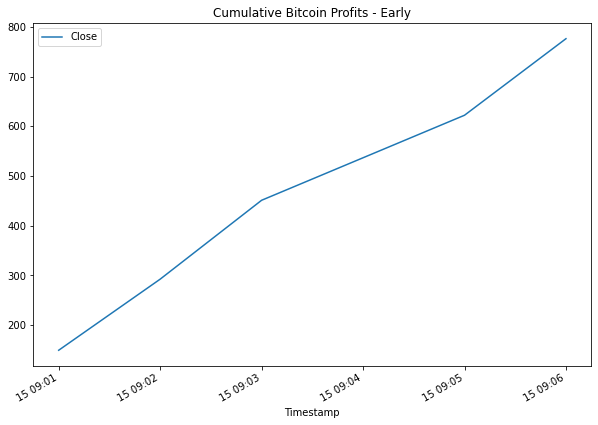

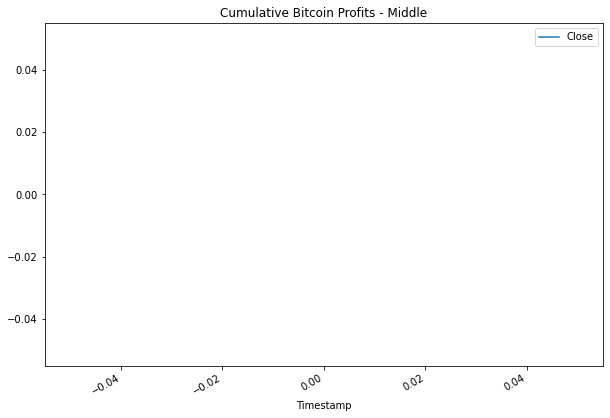

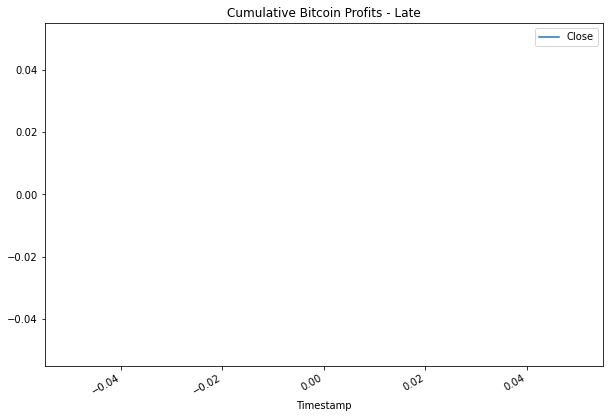

In [53]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
display(cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Early"))
display(cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Middle"))
display(cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits - Late"))

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The sample date I chose for the middle and late periods showed no profitable arbitrage opportunities. Only in the early period did my sample date uncover five profitable arbitrage points. Remarkably, they were all within minutes of each other, at 9 in the morning. Analysis of this sample seems to indicate that arbitrage opportunities are few and far between, but when they do emerge, they emerge in groups. Speedy execution is a must in taking advantage of these arbitrage opportunities.